In [1]:
#!pip install ecmwf-data ecmwf-opendata magpye

In [1]:
import ecmwf.data as ecdata
from magpye import GeoMap
from ecmwf.opendata import Client

In [2]:
client = Client("ecmwf", beta=True)

In [3]:
parameters = ['tp']
filename = 'rain.grib'
filename

'medium-mslp-rain.grib'

In [4]:
stepS=[i for i in range(0, 144, 3)]
client.retrieve(
    date=0,
    time=0,
    step=stepS,
    #stream="oper",
    type="fc",
    #levtype="sfc",
    param=parameters,
    target=filename
)

In [5]:
data = ecdata.read(filename)

In [6]:
data.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
msl,meanSea,0,20220427,0,"12,24",None,151,od,oper,fc,0001
tp,surface,0,20220427,0,"12,24",None,228,od,oper,fc,0001


In [7]:
data.describe('tp')

shortName,tp
name,Total precipitation
paramId,228
units,m
typeOfLevel,surface
level,0
date,20220427
time,0
step,"12,24"
number,None
class,od


In [8]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,tp,surface,0,20220427,0,0-12,fc,None,regular_ll
1,ecmf,msl,meanSea,0,20220427,0,12,fc,None,regular_ll
2,ecmf,tp,surface,0,20220427,0,0-24,fc,None,regular_ll
3,ecmf,msl,meanSea,0,20220427,0,24,fc,None,regular_ll


In [9]:
tp_12 = data.select(shortName='tp', step= 12)
tp_24 = data.select(shortName='tp', step= 24)
tp = (tp_24 - tp_12)
tp.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,tp,surface,0,20220427,0,0-24,fc,None,regular_ll


In [10]:
msl = data.select(shortName= 'msl', step = 24)
msl.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
msl,meanSea,0,20220427,0,24,None,151,od,oper,fc,0001


Mean sea level pressure data has unites Pa, but we want to plot it in hPa, therefore we need to convert it.

In [11]:
msl /= 100

We also need to convert total precipitation from metres to milimetres by multiplying with 1000.

In [12]:
tp = tp * 1000

## Plotting the data
And finally, we can plot the data on the map. 

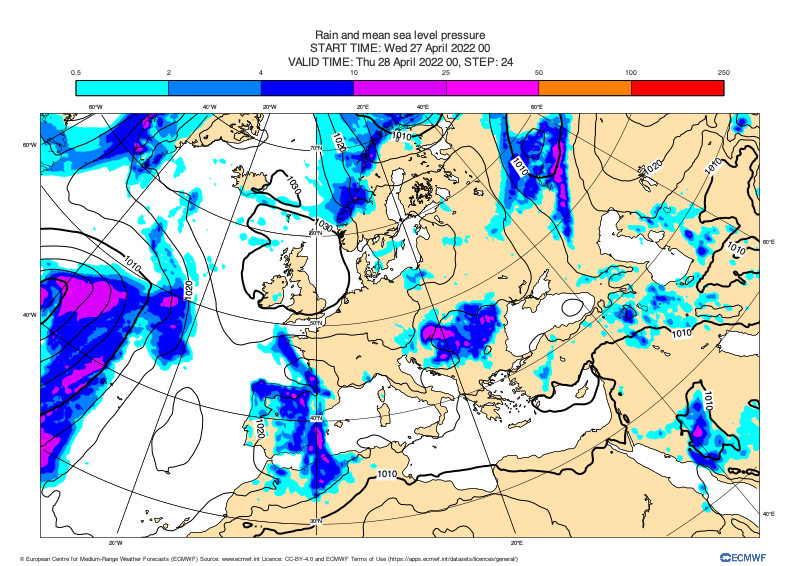

In [13]:
fig = GeoMap(area_name='south_east_asia_and_indonesia')

fig.coastlines(land_colour="cream",resolution="medium")

fig.contour_shaded(tp, style="precipitation_blue_red_250")
fig.contour_lines(msl, style="black_i5")

fig.coastlines(resolution="medium")
fig.gridlines()

fig.title(["Rain and mean sea level pressure", 
           "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' where='shortName=msl' />",
           "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' where='shortName=msl' />, STEP: <grib_info key='step' where='shortName=msl' />"])
fig.legend()
fig.footer("© European Centre for Medium-Range Weather Forecasts (ECMWF) Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use (https://apps.ecmwf.int/datasets/licences/general/)", logo='ecmwf')

fig.show()

Note that plot produced using open data dataset will slightly differ from one from Open Charts. This is due to different resolution of the data.  
Open data is on 0.4x0.4 resolution, while high resolution data is 0.1x0.1 grid.